Gastos públicos dos senadores (projeto Data Science)

Qual senador(a) mais gastou verba pública? 
Qual senador(a) menos gastou verba pública?
Em que foram esses gastos?

Foram utilizados dados abertos do Ceaps(Portal da transparência do senado)

In [30]:
#Lendo as bibliotecas que usaremos no dataset
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [31]:
df = pd.read_csv("2018.csv")#Comando para abrir o dataset

In [32]:
df.head()#lendo as 5 primeiras linhas do dataset

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
0,2018.0,1.0,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,NaN,02/01/2018,Despesa com pagamento de aluguel de imóvel par...,6000
1,2018.0,1.0,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacio...",63.764.211/0001-10,TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA,M2CJMM,02/01/2018,"Companhia Aérea: AVIANCA, Localizador: M2CJMM....","274,99"
2,2018.0,1.0,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacio...",63.764.211/0001-10,TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA,SFEXYF,02/01/2018,"Companhia Aérea: LATAM, Localizador: SFEXYF. P...","1094,29"
3,2018.0,1.0,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacio...",63.764.211/0001-10,TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA,V64HTR,24/01/2018,"Companhia Aérea: AZUL, Localizador: V64HTR. Pa...","1553,99"
4,2018.0,2.0,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,002/18,01/02/2018,Despesa com pagamento de aluguel de imóvel par...,6000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffad65ace48>,
      dtype=object)

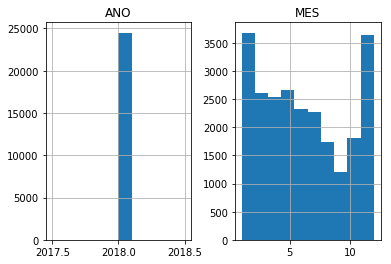

In [33]:
df.hist()

In [34]:
df.dtypes

ANO                  float64
MES                  float64
SENADOR               object
TIPO_DESPESA          object
CNPJ_CPF              object
FORNECEDOR            object
DOCUMENTO             object
DATA                  object
DETALHAMENTO          object
VALOR_REEMBOLSADO     object
dtype: object

In [35]:
df.isnull().sum()#Valores nulos no dataset

ANO                     1
MES                     1
SENADOR                 1
TIPO_DESPESA            1
CNPJ_CPF                1
FORNECEDOR              1
DOCUMENTO            1017
DATA                    1
DETALHAMENTO         5611
VALOR_REEMBOLSADO       1
dtype: int64

In [36]:
df.dropna(inplace=True)#Excluindo linhas que não possuem valor 

In [37]:
#Convertendo a coluna "VALOR_REEMBOLSADO" de string para float, afim de realizar cálculos matemáticos
df["VALOR_REEMBOLSADO"] = df["VALOR_REEMBOLSADO"].str.replace(',', ".").astype('float')

In [38]:
df.dtypes

ANO                  float64
MES                  float64
SENADOR               object
TIPO_DESPESA          object
CNPJ_CPF              object
FORNECEDOR            object
DOCUMENTO             object
DATA                  object
DETALHAMENTO          object
VALOR_REEMBOLSADO    float64
dtype: object

In [39]:
gastospoliticos= {}# Dicionário criado onde vai armazenar o politico e seu gasto

In [40]:
politicos = df['SENADOR'].unique()#estabelece o nome de cada senador presente no arquivo

In [41]:
politicos[0:10]#Alguns políticos contidos no arquivo

array(['ACIR GURGACZ', 'AÉCIO NEVES', 'AIRTON SANDOVAL', 'ALVARO DIAS',
       'ANA AMÉLIA', 'ÂNGELA PORTELA', 'ANTONIO ANASTASIA',
       'ANTÔNIO CARLOS VALADARES', 'ARMANDO MONTEIRO', 'ATAÍDES OLIVEIRA'],
      dtype=object)

In [42]:
for z in politicos:
    z_nomes = df[df['SENADOR']==z]
    totalgastos = z_nomes['VALOR_REEMBOLSADO'].sum()#Soma todas as contas do senador
    gastospoliticos[z] = totalgastos#criando chave e valor no dicionário
    gastos_senador = pd.DataFrame.from_dict(gastospoliticos, orient = 'index')#criando dataframe com base nodicioário
    gastos_senador.columns = ['VALOR_REEMBOLSADO']#Renomeando a coluna com valores
    
    
    

In [43]:
gastos_senador.head()#Primeiras linhas do dataframe criado

,VALOR_REEMBOLSADO
ACIR GURGACZ,311797.29
AÉCIO NEVES,247722.97
AIRTON SANDOVAL,182856.83
ALVARO DIAS,39660.38
ANA AMÉLIA,147226.50


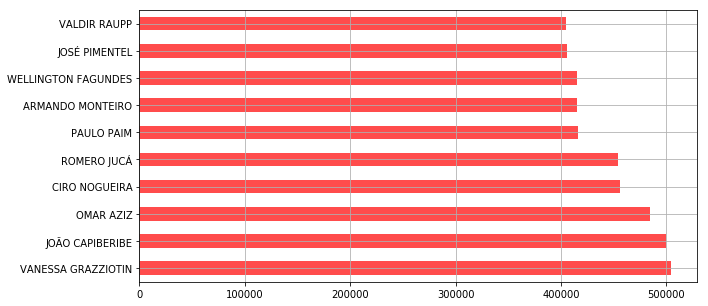

In [44]:
gastos_senador = gastos_senador.sort_values('VALOR_REEMBOLSADO', ascending=False)#Colocando em ordem os valores
gastos_senador.head(10).plot(kind = 'barh', figsize=(10,5), color='red', legend=False, grid=True, alpha=0.7)


In [ ]:
#Senadora Vanessa Grazziotin aparenta ter os maiores gastos no ano, vamos dar uma conferida nos seus gastos

In [45]:
sen_maiorgasto = df[df['SENADOR'] == 'VANESSA GRAZZIOTIN'].reset_index()

In [46]:
sen_maiorgasto.shape[0]#Mostra quantas linhas tem o arquivo

332

In [47]:
sen_maiorgasto.head()#lendo o dataframe criado

,index,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
0,22332,2018.0,1.0,VANESSA GRAZZIOTIN,"Aluguel de imóveis para escritório político, c...",40.432.544/0243-21,CLARO S.A.,68517,17/01/2018,ACESSO À INTERNET,447.78
1,22333,2018.0,1.0,VANESSA GRAZZIOTIN,"Aluguel de imóveis para escritório político, c...",33.000.118/0007-64,OI FIXO-TELEMAR NORTE LESTE S/A,37189,19/01/2018,FATURA TELEFONE FIXO ESCRITÓRIO POLÍTICO,319.57
2,22334,2018.0,1.0,VANESSA GRAZZIOTIN,"Aluguel de imóveis para escritório político, c...",33.000.118/0007-64,OI FIXO-TELEMAR NORTE LESTE S/A,44049,22/01/2018,FATURA TELEFONE FIXO ESCRITÓRIO POLÍTICO,173.87
3,22335,2018.0,1.0,VANESSA GRAZZIOTIN,"Aluguel de imóveis para escritório político, c...",033.515.338-02,RAUL ARMONIA ZAIDAN,S/N,05/01/2018,ALUGUEL DE IMÓVEL PARA ESCRITÓRIO POLÍTICO,2178.39
4,22336,2018.0,1.0,VANESSA GRAZZIOTIN,"Aluguel de imóveis para escritório político, c...",02.558.157/0001-62,VIVO - TELEFÔNICA BRASIL S.A.,415884,18/01/2018,FATURA TELEFONE CELULAR ESCRITÓRIO POLÍTICO,194.82


In [48]:
#Criando uma função que retorna os gastos da senadora
def cat_gastos(senador):
    nome_senador = df[df['SENADOR'] == senador]
    nome_senador = nome_senador.groupby('TIPO_DESPESA')[['SENADOR', 'VALOR_REEMBOLSADO']].sum()
    return nome_senador

vanessa_grazziotin_gastos = cat_gastos('VANESSA GRAZZIOTIN')
vanessa_grazziotin_gastos.sort_values(by='VALOR_REEMBOLSADO', ascending = False)

,VALOR_REEMBOLSADO
TIPO_DESPESA,
"Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar",241638.40
"Passagens aéreas, aquáticas e terrestres nacionais",135807.68
"Locomoção, hospedagem, alimentação, combustíveis e lubrificantes",48843.55
"Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.",45473.52
Divulgação da atividade parlamentar,28587.20
"Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos.",3825.29


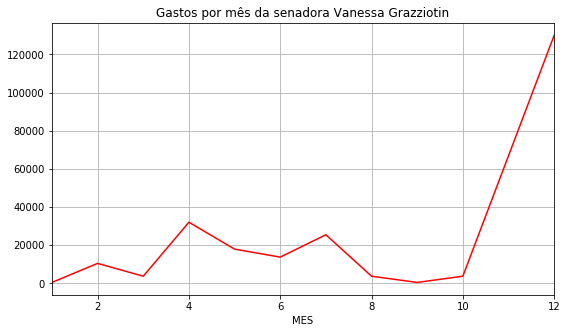

In [63]:
#Abrindo o matplotlib e visualizando os gastos por mês
despesa = sen_maiorgasto[sen_maiorgasto['TIPO_DESPESA'] == 'Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar']
plot_despesa = despesa.groupby('MES')['VALOR_REEMBOLSADO'].sum()
plot_despesa.plot(title = 'Gastos por mês da senadora Vanessa Grazziotin', color = 'red', figsize=(9,5), grid=True)

                         

In [ ]:
#Agora vamos dar uma visualizada no senador que teve os menores gastos

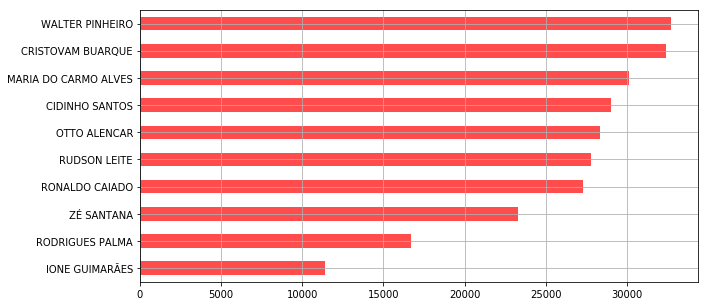

In [64]:
gastos_senador = gastos_senador.sort_values('VALOR_REEMBOLSADO', ascending=True)
gastos_senador.head(10).plot(kind = 'barh', figsize=(10,5), color='red', legend=False, grid=True, alpha=0.7)


Aparentemente a senadora Ione Guimarães teve o menor gasto, mas há um porém, ela trabalhou apenas dois meses antes do recesso do fim de ano

In [65]:
sen_menorgasto = df[df['SENADOR'] == 'IONE GUIMARÃES'].reset_index()

In [67]:
sen_menorgasto.shape[0]#Visualizando quantas linhas há no dataframe

44

In [68]:
sen_menorgasto.head()#Visualizando as 5 primeiras linhas do dataframe

,index,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
0,9193,2018.0,9.0,IONE GUIMARÃES,"Aluguel de imóveis para escritório político, c...",40.432.544/0436-28,Claro S.A,0,15/09/2018,Despesa com pagamento de Pacote de TV por assi...,171.87
1,9194,2018.0,9.0,IONE GUIMARÃES,"Aluguel de imóveis para escritório político, c...",01.543.032/0001-04,Enel Distribuição de Energia.,824227,12/09/2018,Pagamento de energia elétrica do escritório po...,105.61
2,9195,2018.0,9.0,IONE GUIMARÃES,"Aluguel de imóveis para escritório político, c...",01.543.032/0001-04,Enel Distribuição de Energia.,8242264,27/09/2018,Despesa com energia elétrica do escritório pol...,42.12
3,9196,2018.0,9.0,IONE GUIMARÃES,"Aluguel de imóveis para escritório político, c...",02.266.468/0001-58,Urbs Imobiliária,189016,01/10/2018,Pagamento de aluguel do escritório político.,1200.00
4,9197,2018.0,9.0,IONE GUIMARÃES,"Locomoção, hospedagem, alimentação, combustíve...",00.285.353/0001-85,Arvoredo Lanches Eireli EPP,2929,14/09/2018,Despesa com refeição e bebida não alcoólica pa...,105.49


In [69]:
#Onde a senadora obteve os maiores gastos:
ione_guimarães_gastos = cat_gastos('IONE GUIMARÃES')
ione_guimarães_gastos.sort_values(by='VALOR_REEMBOLSADO', ascending = False)

,VALOR_REEMBOLSADO
TIPO_DESPESA,
"Locomoção, hospedagem, alimentação, combustíveis e lubrificantes",9382.62
"Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.",1997.29


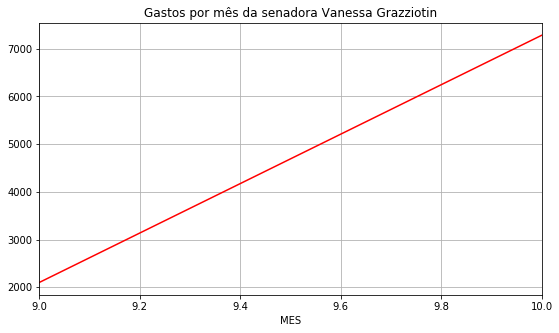

In [71]:
despesa_menor = sen_menorgasto[sen_menorgasto['TIPO_DESPESA'] == 'Locomoção, hospedagem, alimentação, combustíveis e lubrificantes']
plot_despesa_menor = despesa_menor.groupby('MES')['VALOR_REEMBOLSADO'].sum()
plot_despesa_menor.plot(title = 'Gastos por mês da senadora Vanessa Grazziotin', color = 'red', figsize=(9,5), grid=True)